In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.decomposition import PCA
import time

Загрузка данных и масштабирование признаков

In [2]:
# Загрузка датасета
digits = load_digits()
data = digits.data
target = digits.target

# Масштабирование признаков
data_scaled = scale(data)

Вывод информации о выборке

In [3]:
print(f"Размерность массива данных: {data.shape}")  # (n_samples, n_features)
print(f"Количество объектов: {data.shape[0]}")      # Кол-во строк
print(f"Количество признаков: {data.shape[1]}")     # Кол-во столбцов
print(f"Количество уникальных меток: {len(np.unique(target))}")  # Всего 10 цифр

Размерность массива данных: (1797, 64)
Количество объектов: 1797
Количество признаков: 64
Количество уникальных меток: 10


KMeans с инициализацией ‘k-means++’

In [4]:
n_clusters = len(np.unique(target))

start_time = time.time()
kmeans_plus = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10, random_state=42)
kmeans_plus.fit(data_scaled)
elapsed_plus = time.time() - start_time

labels_plus = kmeans_plus.labels_

# Метрики
ari_plus = metrics.adjusted_rand_score(target, labels_plus)
ami_plus = metrics.adjusted_mutual_info_score(target, labels_plus)

print(f"\nМетрика ARI (k-means++): {ari_plus:.4f}  # Adjusted Rand Index")
print(f"Метрика AMI (k-means++): {ami_plus:.4f}  # Adjusted Mutual Information")
print(f"Время выполнения (k-means++): {elapsed_plus:.4f} сек")


Метрика ARI (k-means++): 0.5344  # Adjusted Rand Index
Метрика AMI (k-means++): 0.6678  # Adjusted Mutual Information
Время выполнения (k-means++): 0.0961 сек


KMeans с инициализацией ‘random’

In [5]:
start_time = time.time()
kmeans_random = KMeans(init='random', n_clusters=n_clusters, n_init=10, random_state=42)
kmeans_random.fit(data_scaled)
elapsed_random = time.time() - start_time

labels_random = kmeans_random.labels_

# Метрики
ari_random = metrics.adjusted_rand_score(target, labels_random)
ami_random = metrics.adjusted_mutual_info_score(target, labels_random)

print(f"\nМетрика ARI (random): {ari_random:.4f}")
print(f"Метрика AMI (random): {ami_random:.4f}")
print(f"Время выполнения (random): {elapsed_random:.4f} сек")


Метрика ARI (random): 0.5177
Метрика AMI (random): 0.6568
Время выполнения (random): 0.0525 сек


PCA с количеством компонент = числу уникальных меток

In [6]:
pca = PCA(n_components=n_clusters)
data_pca = pca.fit_transform(data_scaled)

KMeans с инициализацией центров из PCA

In [7]:
start_time = time.time()
kmeans_pca = KMeans(init=pca.components_, n_clusters=n_clusters, n_init=1, random_state=42)
kmeans_pca.fit(data_scaled)
elapsed_pca = time.time() - start_time

labels_pca = kmeans_pca.labels_

# Метрики
ari_pca = metrics.adjusted_rand_score(target, labels_pca)
ami_pca = metrics.adjusted_mutual_info_score(target, labels_pca)

print(f"\nМетрика ARI (PCA init): {ari_pca:.4f}")
print(f"Метрика AMI (PCA init): {ami_pca:.4f}")
print(f"Время выполнения (PCA init): {elapsed_pca:.4f} сек")


Метрика ARI (PCA init): 0.5476
Метрика AMI (PCA init): 0.6960
Время выполнения (PCA init): 0.0141 сек


Сравнение всех трёх моделей

In [8]:
print("\n Сравнение подходов:")
print(f"KMeans++  → ARI: {ari_plus:.4f}, AMI: {ami_plus:.4f}, Время: {elapsed_plus:.4f} сек")
print(f"Random    → ARI: {ari_random:.4f}, AMI: {ami_random:.4f}, Время: {elapsed_random:.4f} сек")
print(f"PCA init  → ARI: {ari_pca:.4f}, AMI: {ami_pca:.4f}, Время: {elapsed_pca:.4f} сек")


 Сравнение подходов:
KMeans++  → ARI: 0.5344, AMI: 0.6678, Время: 0.0961 сек
Random    → ARI: 0.5177, AMI: 0.6568, Время: 0.0525 сек
PCA init  → ARI: 0.5476, AMI: 0.6960, Время: 0.0141 сек


Визуализация кластеров и центров

In [9]:
pca_2d = PCA(n_components=2)
data_2d = pca_2d.fit_transform(data_scaled)

# Обучим снова для 2D визуализации
kmeans_vis = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10, random_state=42)
kmeans_vis.fit(data_2d)
labels_vis = kmeans_vis.labels_
centers_2d = kmeans_vis.cluster_centers_

# Сетка для границ
x_min, x_max = data_2d[:, 0].min() - 1, data_2d[:, 0].max() + 1
y_min, y_max = data_2d[:, 1].min() - 1, data_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

Z = kmeans_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

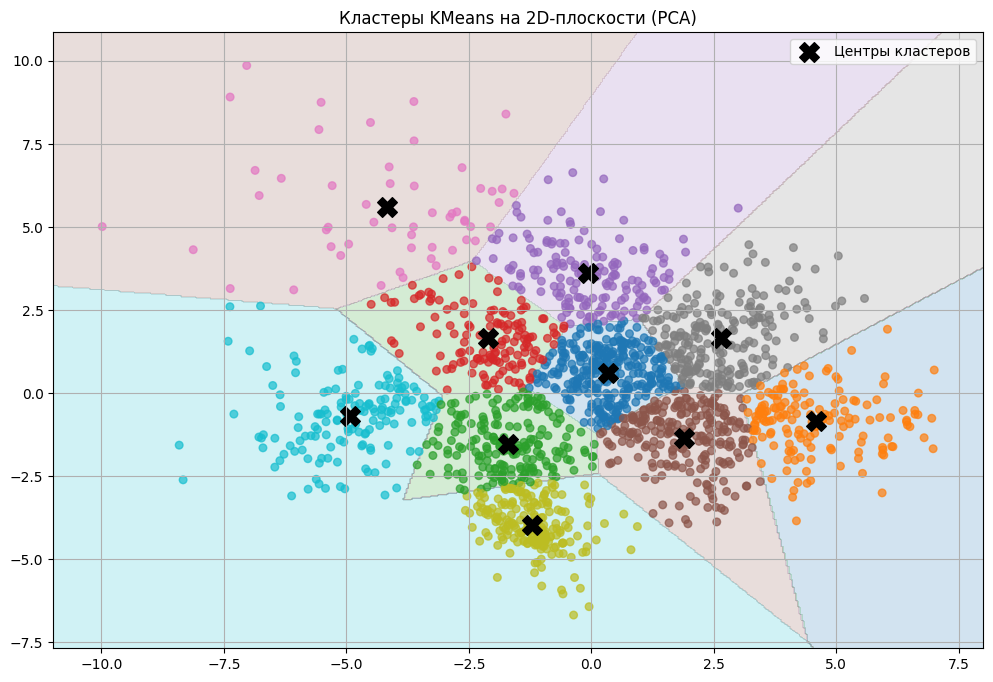

In [10]:
plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, Z, alpha=0.2, cmap='tab10')
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels_vis, cmap='tab10', s=30, alpha=0.7)
plt.scatter(centers_2d[:, 0], centers_2d[:, 1], c='black', s=200, marker='X', label='Центры кластеров')
plt.title("Кластеры KMeans на 2D-плоскости (PCA)")
plt.legend()
plt.grid(True)
plt.show()